# Laboratorio 1: MovieAlpes


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/data.csv', sep=';')

## 1. Entendimiento de los datos

En esta etapa es importante saber si los datos son o no suficientes para el alcance del proyecto y, en caso de serlo, entender bien sus características para poder definir el camino de limpieza y preparación para lograr el objetivo del proyecto.
En particular, es importante realizar un perfilamiento completo que incluya lo descrito en el manterial del curso -ver infografía de entendimiento de datos-, donde se incluye estadística descriptiva y gráficos sobre los datos, señalando sus principales estadísticos: media, varianza, desviación estándar, etc., para el caso de las columnas numéricas. En caso de datos categóricos recuerde que es importante conocer las categorías y en qué proporción se presentan. Tener en cuenta que una parte fundamental de esta etapa está relacionada con el análisis a nivel de calidad de datos y, en particular, a nivel de las dimensiones de calidad (completitud, unicidad, consistencia, validez) para identificar las actividades de preparación que requieren los datos.

### 1.1 Perfilamiento de datos

In [4]:
df.shape

(7471, 18)

In [5]:
df.head()

,#,index,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,ordering,region,language,types,attributes,isOriginalTitle,main_genre,secondary_genre
0,1,1,tt0103064,movie,Terminator 2: Judgment Day,0.0,1991.0,137,8.6,1128166.0,17.0,US,en,dvd,\N,0.0,Action,Sci-Fi
1,10,17,tt0231050,tvSeries,ToransufÃ´mÃ¢: KÃ¢robotto,0.0,2000.0,22,6.6,577.0,16.0,US,en,alternative,\N,0.0,Action,Adventure
2,13,23,tt0253474,movie,The Pianist,0.0,2002.0,150,8.5,860569.0,7.0,US,en,imdbDisplay,\N,0.0,Biography,Drama
3,21,55,tt0369339,movie,Collateral,0.0,2004.0,120,7.5,417391.0,6.0,US,en,imdbDisplay,\N,0.0,Action,Crime
4,28,87,tt0439547,movie,2 Filhos de Francisco: A HistÃ³ria de ZezÃ© di...,0.0,2005.0,132,6.9,5946.0,5.0,US,en,imdbDisplay,\N,0.0,Biography,Drama


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7471 entries, 0 to 7470
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   #                7471 non-null   int64  
 1   index            7471 non-null   int64  
 2   tconst           7471 non-null   object 
 3   titleType        7471 non-null   object 
 4   originalTitle    7471 non-null   object 
 5   isAdult          7470 non-null   float64
 6   startYear        7470 non-null   float64
 7   runtimeMinutes   7470 non-null   object 
 8   averageRating    7470 non-null   float64
 9   numVotes         7470 non-null   float64
 10  ordering         7470 non-null   float64
 11  region           7470 non-null   object 
 12  language         7470 non-null   object 
 13  types            7470 non-null   object 
 14  attributes       7470 non-null   object 
 15  isOriginalTitle  7470 non-null   float64
 16  main_genre       7470 non-null   object 
 17  secondary_genr

In [9]:
df.describe()

,#,index,isAdult,startYear,averageRating,numVotes,ordering,isOriginalTitle
count,7471.000000,7471.000000,7470.0,7470.000000,7470.000000,7.470000e+03,7470.000000,7470.0
mean,4043.482666,5440.458439,0.0,2013.157296,7.475676,7.282830e+04,16.567604,0.0
std,2192.753689,2752.820924,0.0,6.979151,2.771444,1.640233e+05,12.761147,0.0
min,1.000000,1.000000,0.0,1990.000000,6.500000,1.000000e+01,1.000000,0.0
25%,2152.500000,3073.500000,0.0,2008.000000,6.900000,6.265250e+03,6.000000,0.0
50%,4033.000000,5421.000000,0.0,2015.000000,7.300000,1.527900e+04,14.000000,0.0
75%,5914.500000,7641.500000,0.0,2019.000000,7.800000,5.641975e+04,24.000000,0.0
max,7849.000000,10274.000000,0.0,2023.000000,92.000000,2.197234e+06,119.000000,0.0


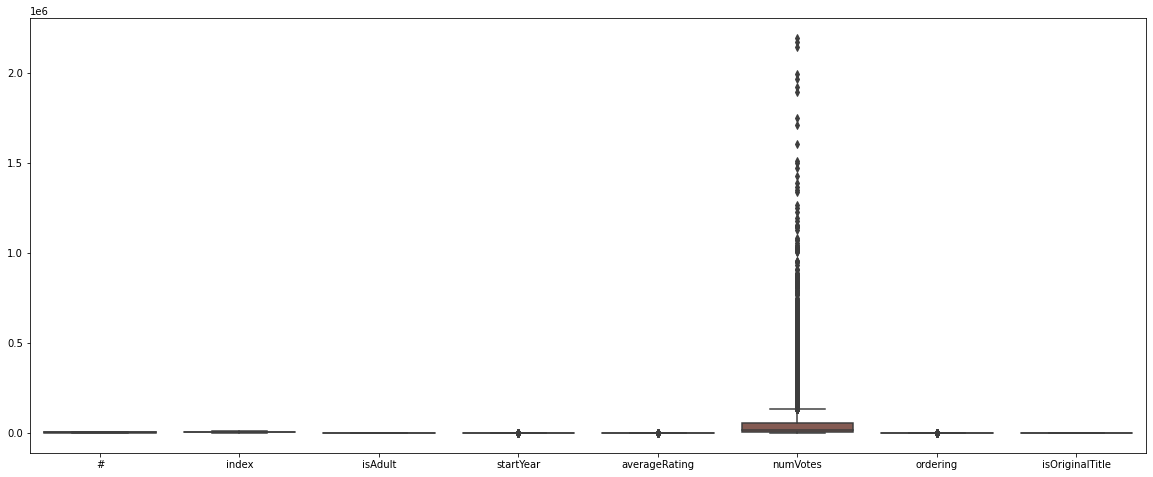

In [10]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df, orient="v")

A continuación esetudiaremos los datos separandolos entre datos númericos y categoricos

In [25]:
cols_float = df.select_dtypes(include = ['float']).columns
cols_int = df.select_dtypes(include = ['int64']).columns
print(cols_float, cols_int)

Index(['isAdult', 'startYear', 'averageRating', 'numVotes', 'ordering',
       'isOriginalTitle'],
      dtype='object') Index(['#', 'index'], dtype='object') Index(['tconst', 'titleType', 'originalTitle', 'runtimeMinutes', 'region',
       'language', 'types', 'attributes', 'main_genre', 'secondary_genre'],
      dtype='object')


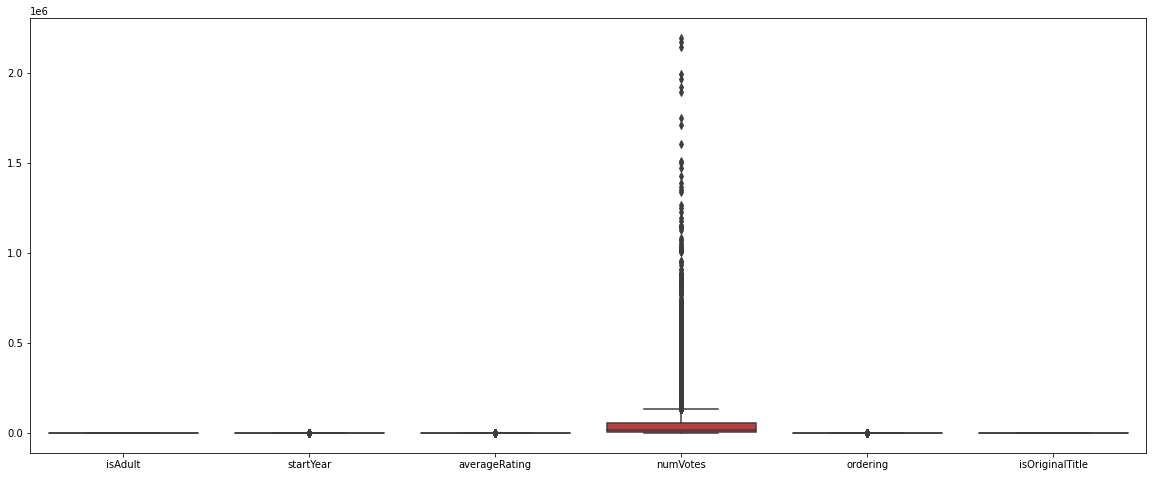

In [17]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df[cols_float], orient="v")

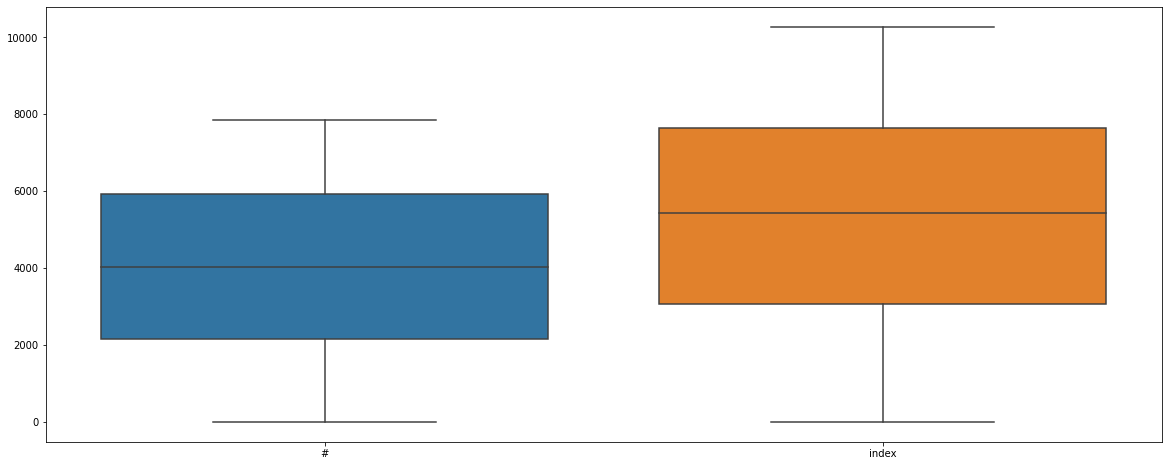

In [18]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df[cols_int], orient="v")

In [27]:
cols_non_number = df.select_dtypes(include = ['object']).columns
cols_non_number

Index(['tconst', 'titleType', 'originalTitle', 'runtimeMinutes', 'region',
       'language', 'types', 'attributes', 'main_genre', 'secondary_genre'],
      dtype='object')

Cabe mencionar que al comparar el diccionario que se nos dio vemos que hay varios datos que aparecen como categoricos pero en realidad deberían ser datos númericos

In [28]:
df[cols_non_number].describe()

,tconst,titleType,originalTitle,runtimeMinutes,region,language,types,attributes,main_genre,secondary_genre
count,7471,7471,7471,7470,7470,7470,7470,7470,7470,7470
unique,7466,7,7290,362,4,1,5,1,22,26
top,tt0395843,movie,Home,60,IN,en,imdbDisplay,\N,Drama,Drama
freq,2,4673,3,534,5590,7470,7395,7470,1767,2428


## 2. Preparación de datos

Es el procedimiento llevado a cabo para transformar los valores actuales de acuerdo con el objetivo de negocio a resolver, las técnicas y algoritmos a utilizar, y la calidad de los datos. Incluye la limpieza de los datos, como el manejo de los datos nulos (missing values) y los valores atípicos (outliers) con la justificación respectiva.

In [19]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

numVotes           0.000134
ordering           0.000134
main_genre         0.000134
isOriginalTitle    0.000134
attributes         0.000134
types              0.000134
language           0.000134
region             0.000134
secondary_genre    0.000134
averageRating      0.000134
runtimeMinutes     0.000134
startYear          0.000134
isAdult            0.000134
index              0.000000
originalTitle      0.000000
titleType          0.000000
tconst             0.000000
#                  0.000000
dtype: float64

Ya que a priori se ve que los datos de todas las columnas tienen alto nivel de completitud pasaremos a analizar las columnas teniendo en cuenta los datos del diccionario de datos que nos pasaron

In [21]:
df.titleType.unique()

array(['movie', 'tvSeries', 'MOVIE', 'tvMiniSeries', 'MOvie', 'Movie',
       'tvMovie'], dtype=object)

En el diccionario de datos se nos dice lo siguiente sobre la columna de titleType, Tipo de contenido (movie, tvSeries, tvMiniSeries, tvMovie), al comparar nos damos cuenta de que hay datos  pero escritos de manera diferente, como MOVIE y MOvie, esto es lo mismo que movie pero al estar escrito diferente queda como si fuese una categoria diferente, es por esto que cambiaremos esos datos para que queden solo los tipos que se nos dieron en el diccionario de datos

In [22]:
df.titleType = df.titleType.str.lower()
df.titleType.unique()

array(['movie', 'tvseries', 'tvminiseries', 'tvmovie'], dtype=object)

Como vemos ahora los datos de titleType se encuentran en el formato correcto

In [25]:
print(df.isAdult.unique(), df.isOriginalTitle.unique(), df.attributes.unique(), df.language.unique())

[ 0. nan] [ 0. nan] ['\\N' nan] ['en' nan]


Como vemos las columnas de isAdult, isOriginalTitle y attributes no aportan valor al analisis de datos ya que solo tienen valores de 0 o nan y la columna de language tampoco aporta ya que solo tiene peliculas en ingles. Es por esto que a continuación eliminaremos todas las columnas que no agregan valor analisis de datos. Dentro de las columnas que eliminaremos tambien se esncuentran #, index y language el cual solo presenta en o nan por lo tanto no le terminan agregando valor al analisis 

In [30]:
df = df.drop(['#', 'index', 'isAdult', 'attributes', 'isOriginalTitle', 'language'], axis=1)

In [45]:
df.sample(5)

,tconst,titleType,originalTitle,startYear,runtimeMinutes,averageRating,numVotes,ordering,region,types,main_genre,secondary_genre
3220,tt2098220,tvseries,Hunter x Hunter,2011-01-01,24,9.0,113339.0,6.0,IN,imdbDisplay,Action,Adventure
2082,tt1298650,movie,Pirates of the Caribbean: On Stranger Tides,2011-01-01,137,6.6,543552.0,29.0,IN,imdbDisplay,Action,Adventure
1532,tt10698680,movie,K.G.F: Chapter 2,2022-01-01,168,8.3,140428.0,19.0,IN,imdbDisplay,Action,Crime
7064,tt3759416,movie,AstÃ©rix: Le domaine des dieux,2014-01-01,85,6.9,14741.0,20.0,CA,imdbDisplay,Adventure,Animation
7150,tt4698584,movie,Neruda,2016-01-01,107,6.8,10730.0,10.0,CA,imdbDisplay,Biography,Crime


In [32]:
# Se muestran algunos registros de canciones aparentemente repetidos
# Los repetidos se pueden analizar por la totalidad de sus valores o como en este caso por un subconjunto de estos
df.loc[df.duplicated(subset = df.columns[1:], keep = False)].sort_values(by = 'originalTitle').head(10)

,tconst,titleType,originalTitle,startYear,runtimeMinutes,averageRating,numVotes,ordering,region,types,main_genre,secondary_genre


Se busca en los registros por nombre de pelicula los valores duplicados.

In [26]:
print('Total de peliculas repetidas:', df.loc[df.duplicated(subset = df.columns[1:], keep = False)].shape[0])

Total de peliculas repetidas: 6


In [28]:
# Se eliminan los repetidos que se hayan identificado aún cuando la columna id sea diferente
df.drop_duplicates(subset = df.columns[1:], inplace = True)

In [31]:
print('Total de peliculas repetidas:', df.loc[df.duplicated(subset = df.columns[1:], keep = False)].shape[0])

Total de peliculas repetidas: 0


In [34]:
df.shape

(7468, 12)

In [35]:
df.dropna(inplace = True)
df.shape


(7467, 12)

In [46]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

tconst             0.0
titleType          0.0
originalTitle      0.0
startYear          0.0
runtimeMinutes     0.0
averageRating      0.0
numVotes           0.0
ordering           0.0
region             0.0
types              0.0
main_genre         0.0
secondary_genre    0.0
dtype: float64

In [39]:
df.startYear.unique()
df.dtypes

tconst              object
titleType           object
originalTitle       object
startYear          float64
runtimeMinutes      object
averageRating      float64
numVotes           float64
ordering           float64
region              object
types               object
main_genre          object
secondary_genre     object
dtype: object

In [54]:
# Dado que se tienen fechas no estandarizadas, se aplica un preprocesamiento que garantice dicha estandarización
df['startYear'] = pd.to_datetime(df['startYear'], format='%yyyy')

In [55]:
df.startYear.sample(5)

1232   2021-01-01
6924   2013-01-01
4746   2019-01-01
1372   2020-01-01
455    2001-01-01
Name: startYear, dtype: datetime64[ns]

In [59]:

df['startYear'] = df['startYear'].dt.year


,tconst,titleType,originalTitle,startYear,runtimeMinutes,averageRating,numVotes,ordering,region,types,main_genre,secondary_genre
139,tt0108937,tvseries,Space Ghost Coast to Coast,1993,15,7.9,7489.0,3.0,IN,imdbDisplay,Animation,Comedy
1827,tt11773456,movie,Naandhi,2021,146,7.9,4662.0,8.0,IN,imdbDisplay,Crime,Drama
1470,tt10457128,movie,ÃtÃ© 85,2020,101,6.9,11349.0,25.0,IN,imdbDisplay,Drama,Romance
6484,tt1264904,movie,Le Petit Nicolas,2009,91,7.1,13728.0,12.0,CA,imdbDisplay,Comedy,Family
2716,tt1590089,movie,Kokuhaku,2010,106,7.7,40670.0,21.0,IN,imdbDisplay,Drama,Thriller


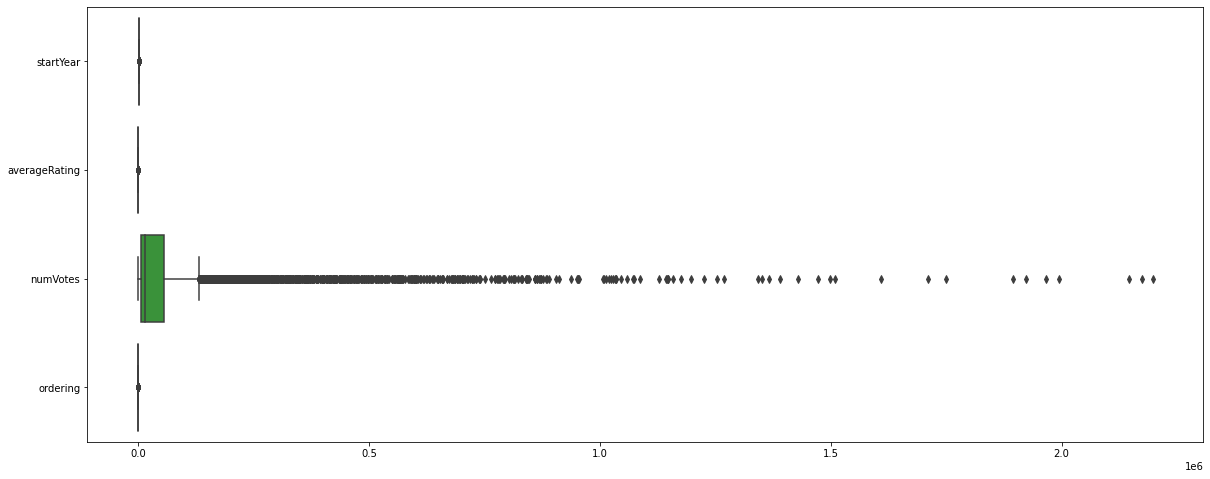

In [63]:
fig = plt.figure(figsize = (20, 8))
ax = sns.boxplot(data = df, orient = 'h')

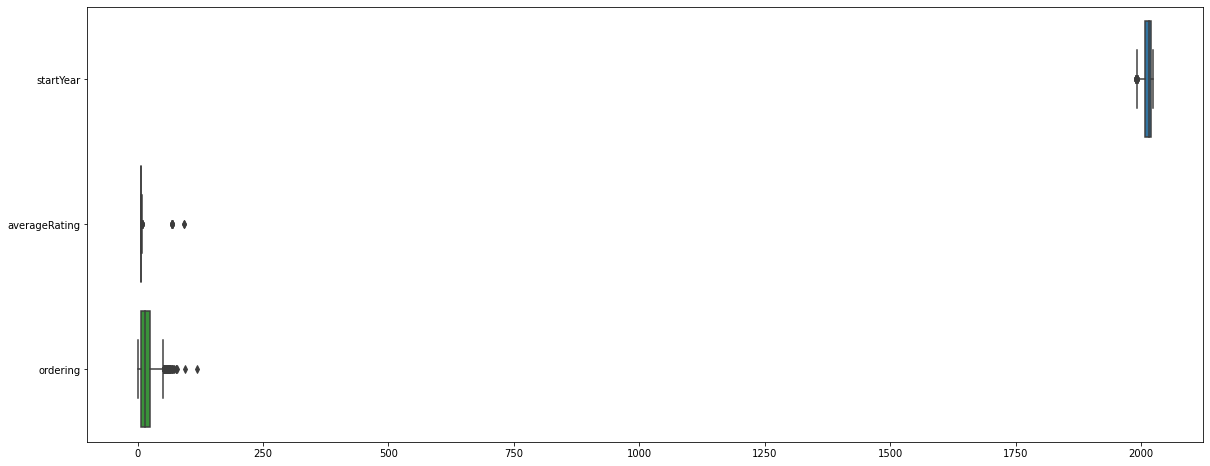

In [65]:
# Se remueve la variable duration_ms para propósitos de visualización
fig = plt.figure(figsize = (20, 8))
ax = sns.boxplot(data = df.drop(['numVotes'], axis = 1), orient = 'h')

## 3. Modelamiento 
En este paso se lleva a cabo la elección del modelo con el que queremos cumplir nuestra tarea de aprendizaje.
En este caso, deben usar el algoritmo de K-Means y deberán compararlo con otros dos algoritmos de agrupación, como clustering jerárquico, DBScan, HDBScan, Gaussian Mixture.
Tengan en cuenta que, en ambientes profesionales, la elección y justificación del algoritmo y sus hiperparámetros hace parte de su tarea de consultoría.
Se sugiere explorar la generación de grupos que puedan llevar a mejores valores de coeficiente de silueta, al igual que a una mejor descripción de los grupos identificados que aporte a la organización.

## 3. Validación 
En modelos de aprendizaje no supervisado la validación de los modelos es un reto importante que deben asumir los consultores.

## 4.  Visualización
El estudiante debe proponer una visualización de los resultados obtenidos en un tablero de control,
de tal manera que el cliente tenga la capacidad de entender los resultados obtenidos en su labor de consultoría.